In [25]:
import numpy as np
import pandas as pd
from statsbombpy import sb
#pd.set_option('display.max_rows', None)
from mplsoccer import Pitch, Sbopen
from mplsoccer import VerticalPitch,Pitch
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [3]:
sb.matches(competition_id= 43, season_id=3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,7585,2018-07-03,20:00:00.000,International - FIFA World Cup,2018,Colombia,England,1,1,available,...,2021-06-13T16:17:31.694,4,Round of 16,Otkritie Bank Arena,Mark Geiger,José Néstor Pekerman,Gareth Southgate,1.0.2,None,None
1,7570,2018-06-28,20:00:00.000,International - FIFA World Cup,2018,England,Belgium,0,1,available,...,2021-06-13T16:17:31.694,3,Group Stage,Stadion Kaliningrad,Damir Skomina,Gareth Southgate,Roberto Martínez Montoliú,1.0.2,None,None
2,7586,2018-07-03,16:00:00.000,International - FIFA World Cup,2018,Sweden,Switzerland,1,0,available,...,2021-06-13T16:17:31.694,4,Round of 16,Saint-Petersburg Stadium,Damir Skomina,Jan Olof Andersson,Vladimir Petković,1.0.2,None,None
3,7557,2018-06-25,20:00:00.000,International - FIFA World Cup,2018,Iran,Portugal,1,1,available,...,2021-06-13T16:17:31.694,3,Group Stage,Mordovia Arena,Enrique Cáceres,Carlos Manuel Brito Leal Queiróz,Fernando Manuel Fernandes da Costa Santos,1.0.2,None,None
4,7542,2018-06-20,14:00:00.000,International - FIFA World Cup,2018,Portugal,Morocco,1,0,available,...,2021-06-13T16:17:31.694,2,Group Stage,Stadion Luzhniki,Mark Geiger,Fernando Manuel Fernandes da Costa Santos,Hervé Renard,1.0.2,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,7540,2018-06-19,20:00:00.000,International - FIFA World Cup,2018,Russia,Egypt,3,1,available,...,2021-06-13T16:17:31.694,2,Group Stage,Saint-Petersburg Stadium,Enrique Cáceres,Stanislav Cherchesov,Héctor Raúl Cúper,1.0.2,None,None
60,8652,2018-07-07,20:00:00.000,International - FIFA World Cup,2018,Russia,Croatia,2,2,available,...,2021-06-13T16:17:31.694,5,Quarter-finals,\tOlimpiyskiy Stadion Fisht,Sandro Ricci,Stanislav Cherchesov,Zlatko Dalić,1.0.2,None,None
61,7563,2018-06-26,16:00:00.000,International - FIFA World Cup,2018,Denmark,France,0,0,available,...,2021-06-13T16:17:31.694,3,Group Stage,Stadion Luzhniki,Sandro Ricci,Åge Fridtjof Hareide,Didier Deschamps,1.0.2,None,None
62,7556,2018-06-24,17:00:00.000,International - FIFA World Cup,2018,Japan,Senegal,2,2,available,...,2021-06-13T16:17:31.694,2,Group Stage,\tEkaterinburg Arena,Gianluca Rocchi,Akira Nishino,Aliou Cissé,1.0.2,None,None


In [4]:
events = sb.events(match_id=8657)

In [5]:
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'counterpress', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_cut_back',
       'pass_deflected', 'pass_end_location', 'pass_goal_assist',
       'pass_height', 'pass_length', 'pass_outcome', 'pass_recipient',
       'pass_shot_assist

In [6]:
events = events[['player_id','team','type','minute','location','pass_end_location','player','pass_recipient']]
events = events[events['team'] == 'England'].reset_index()

In [7]:
events = events.dropna(subset=['location'])


In [8]:
events.head(20)

,index,player_id,team,type,minute,location,pass_end_location,player,pass_recipient
3,19,3504.0,England,Pass,0,"[79.0, 43.0]","[76.0, 5.0]",Ruben Loftus-Cheek,Raheem Sterling
4,20,3594.0,England,Pass,0,"[56.0, 3.0]","[56.0, 13.0]",Danny Rose,Fabian Delph
5,21,4597.0,England,Pass,0,"[54.0, 9.0]","[56.0, 6.0]",Fabian Delph,Danny Rose
6,22,3594.0,England,Pass,0,"[53.0, 3.0]","[50.0, 9.0]",Danny Rose,Fabian Delph
7,23,4597.0,England,Pass,0,"[50.0, 9.0]","[49.0, 23.0]",Fabian Delph,Eric Dier
8,24,10956.0,England,Pass,1,"[51.0, 38.0]","[49.0, 65.0]",Eric Dier,Phil Jones
9,25,3314.0,England,Pass,1,"[50.0, 66.0]","[44.0, 59.0]",Phil Jones,John Stones
10,26,3244.0,England,Pass,1,"[45.0, 56.0]","[52.0, 60.0]",John Stones,Eric Dier
11,27,10956.0,England,Pass,1,"[51.0, 58.0]","[44.0, 51.0]",Eric Dier,John Stones
12,28,3244.0,England,Pass,1,"[52.0, 41.0]","[58.0, 10.0]",John Stones,Harry Maguire


In [26]:
G = nx.DiGraph()
aux = []
for player in events['player']:
    if player not in aux:
        aux.append(player)
G.add_nodes_from(aux)
edges = []
for index,row in events.iterrows():
    x = row['player']
    y = row['pass_recipient']
    if 
    edges.append((x, y))
G.add_edges_from(edges)
plt.show()

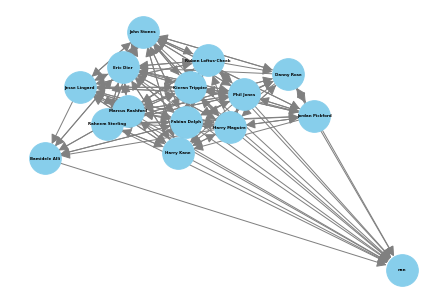

In [30]:
pos = nx.spring_layout(G, seed=42)  # Layout for the nodes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=4, font_color='black', font_weight='bold', edge_color='gray', arrowsize=20)

plt.show()